In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import simplejson

/Users/guangyu/Documents/pyvenvs/mids3.6.7/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
routesData = pd.read_csv("routes.csv", names = ["airline_code","airline_ID", "src_port_code", "src_port_id",
                                  "dest_port_code","dest_port_id", "code_share", "stops", "equipment"])
routesData.head()

,airline_code,airline_ID,src_port_code,src_port_id,dest_port_code,dest_port_id,code_share,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [3]:
routesData.shape

(67663, 9)

In [4]:
airlineData = pd.read_csv("airlines.csv", names = ["airline_ID","airline_name","alias","iata","airline_code",
                                                   "call_sign","country","active"])
airlineData.head(10)

,airline_ID,airline_name,alias,iata,airline_code,call_sign,country,active
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
5,5,213 Flight Unit,\N,NaN,TFU,NaN,Russia,N
6,6,223 Flight Unit State Airline,\N,NaN,CHD,CHKALOVSK-AVIA,Russia,N
7,7,224th Flight Unit,\N,NaN,TTF,CARGO UNIT,Russia,N
8,8,247 Jet Ltd,\N,NaN,TWF,CLOUD RUNNER,United Kingdom,N
9,9,3D Aviation,\N,NaN,SEC,SECUREX,United States,N


In [5]:
airlineData.shape

(6162, 8)

In [6]:
route_cnt = routesData['airline_ID'].value_counts()

Text(0.5, 0, 'Airline ID')

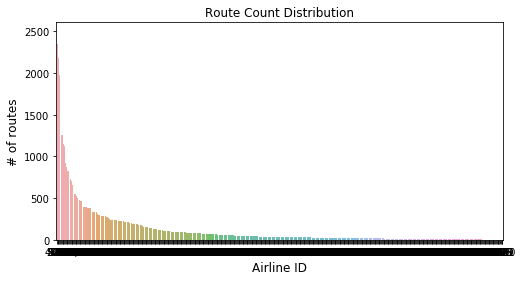

In [7]:
plt.figure(figsize=(8,4))
ax= sns.barplot(route_cnt.index, route_cnt.values, alpha=0.8)
plt.title("Route Count Distribution")
plt.ylabel('# of routes', fontsize=12)
plt.xlabel('Airline ID', fontsize=12)

In [8]:
route_cnt.shape

(548,)

In [9]:
route_cnt[:50,]

4296     2484
24       2354
5209     2180
2009     1981
5265     1960
1767     1454
1758     1263
751      1260
4547     1146
2297     1130
137      1071
3320      923
596       877
2822      831
3090      830
4611      815
214       798
1316      726
330       705
4951      658
3737      576
2660      555
1355      549
324       547
439       530
4319      504
8745      488
\N        479
130       473
2548      470
5461      463
4089      432
321       431
3029      399
13983     397
218       393
4608      392
2987      388
5484      386
2439      384
4533      383
35        378
690       358
5416      341
2220      337
3378      336
1868      334
4867      333
1790      332
2350      328
Name: airline_ID, dtype: int64

In [10]:
airlineData.loc[airlineData['airline_ID'] == 4296]

,airline_ID,airline_name,alias,iata,airline_code,call_sign,country,active
4290,4296,Ryanair,\N,FR,RYR,RYANAIR,Ireland,Y


In [13]:
topairlines = 200
airlines = []
for i in range(topairlines):
    if (route_cnt.index[i] == '\\N'):
        continue
    airlines.append({"label":airlineData.loc[airlineData['airline_ID'] == int(route_cnt.index[i])]['airline_name'].to_string(index=False),
                     "id":route_cnt.index[i]})
f = open('topairlines.json', 'w')
simplejson.dump(airlines, f)
f.close()

In [12]:
int(route_cnt.index[1])

24